In [35]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from math import sqrt
import shap

In [37]:
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 

In [38]:
def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it, not to be used in a grouping function

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

In [39]:
def prepare_data(df):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, target = df['phone_size'], df['month'], df['year'], df['week_of_year'], df['quarter'], df['weeks_since_release'], df['holiday'], df['default'], df['mini'], df['pro'], df['pro max'], df['claim'] 
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, target = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5), np.array(x6), np.array(x7), np.array(x8), np.array(x9), np.array(x10), np.array(x11), np.array(target)
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, target = x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), x4.reshape(-1, 1), x5.reshape(-1, 1), x6.reshape(-1, 1), x7.reshape(-1, 1), x8.reshape(-1, 1), x9.reshape(-1, 1), x10.reshape(-1, 1), x11.reshape(-1, 1),target.reshape(-1, 1)
    features = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11,), axis = 1)
    
    return features, target

In [59]:
df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iphone13_tree.csv', parse_dates=['weeks_monday'])

In [60]:
df = df.sort_values('weeks_since_release')

In [61]:
features, target = prepare_data(df)

In [62]:
X_train, X_test, y_train, y_test = features[:-50], features[-50:], target[:-50], target[-50:]

In [63]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(random_state=42)

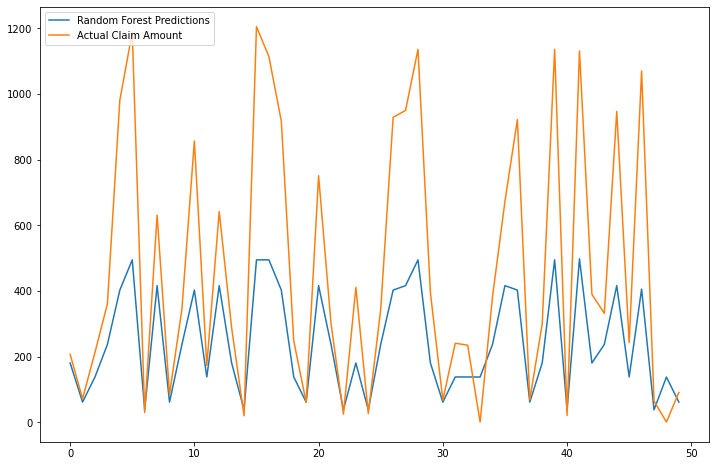

In [64]:
pred = rf_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = "Random Forest Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

In [65]:
rmse_rf = sqrt(mean_squared_error(pred, y_test))
print("Mean sqaured error for Random Forest model is: ", rmse_rf)

Mean sqaured error for Random Forest model is:  333.36978361573205


In [66]:
y_test_series = pd.Series(y_test.ravel())
pred_series = pd.Series(pred.ravel())
wmape_score = wmape(y_test_series, pred_series)
print("WMAPE: {:.2%}".format(wmape_score))

WMAPE: 50.84%


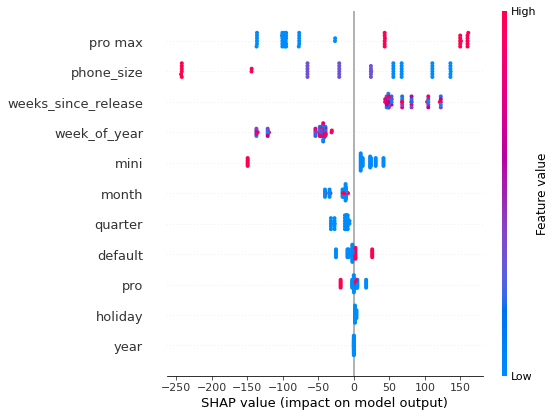

In [67]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test)

X_test_df = pd.DataFrame(X_test, columns=['phone_size', 'month', 'year', 'week_of_year', 'quarter', 'weeks_since_release', 'holiday', 'default', 'mini', 'pro', 'pro max'])

shap.summary_plot(shap_values, X_test_df)

In [68]:
iphone14 = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iphone14_tree.csv', parse_dates=['weeks_monday'])

In [69]:
iphone14 = iphone14.sort_values('weeks_since_release')

In [70]:
X_test, y_test = prepare_data(iphone14)

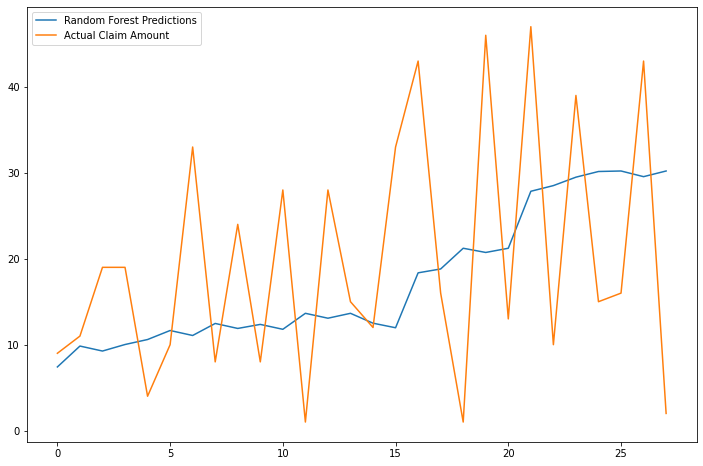

In [71]:
pred = rf_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = "Random Forest Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

In [72]:
rmse_rf = sqrt(mean_squared_error(pred, y_test))
print("Mean sqaured error for Random Forest model is: ", rmse_rf)
y_test_series = pd.Series(y_test.ravel())
pred_series = pd.Series(pred.ravel())
wmape_score = wmape(y_test_series, pred_series)
print("WMAPE: {:.2%}".format(wmape_score))

Mean sqaured error for Random Forest model is:  14.540472334634996
WMAPE: 61.23%


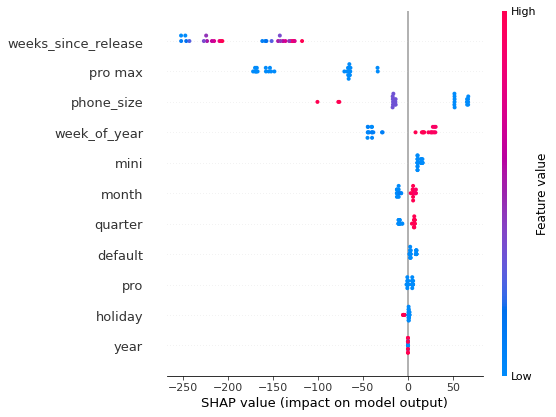

In [73]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test)

X_test_df = pd.DataFrame(X_test, columns=['phone_size', 'month', 'year', 'week_of_year', 'quarter', 'weeks_since_release', 'holiday', 'default', 'mini', 'pro', 'pro max'])

shap.summary_plot(shap_values, X_test_df)